In [1]:
%tensorflow_version 2.x # this line of code is only required if you are using a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Loading and Splitting our data into Training and Testing data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


# Plotting some of the images to verify !

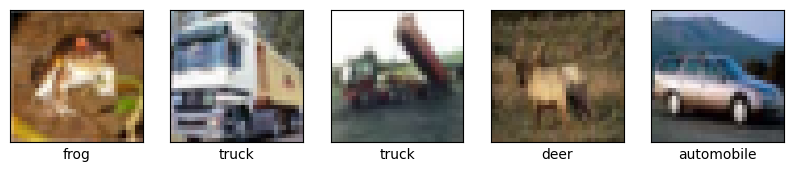

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
# Create the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
# displaying the architecture of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
# Adding the Dense Layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10 becoz there are ten classes in total

"""class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']"""

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.4919 - accuracy: 0.4549 - val_loss: 1.1966 - val_accuracy: 0.5747
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1135 - accuracy: 0.6069 - val_loss: 1.0666 - val_accuracy: 0.6261
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9647 - accuracy: 0.6619 - val_loss: 0.9575 - val_accuracy: 0.6656
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8680 - accuracy: 0.6964 - val_loss: 0.9215 - val_accuracy: 0.6782
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7986 - accuracy: 0.7222 - val_loss: 0.8532 - val_accuracy: 0.7024
Epoch 6/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7410 - accuracy: 0.7416 - val_loss: 0.8404 - val_accuracy: 0.7032
Epoch 7/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.6928 - accuracy: 0.7585 - val_loss: 0.8845 -

313/313 - 5s - loss: 0.8833 - accuracy: 0.7170 - 5s/epoch - 16ms/step
0.7170000076293945


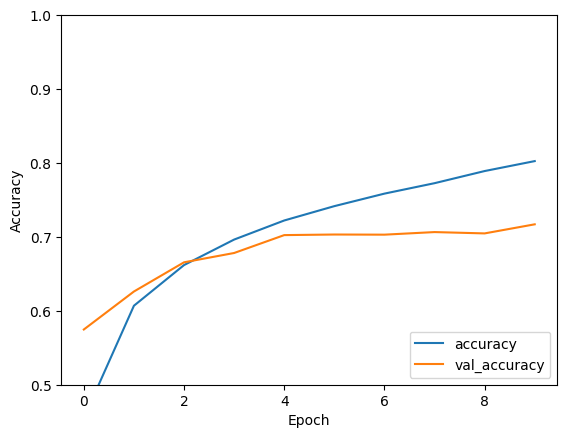

In [9]:
# Evaluating our model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)